In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# changing directory
from os import chdir
chdir('/content/drive/MyDrive/STACC')

In [3]:
!ls

2023_STACC_Data_Scientist_Test_Task.ipynb
est_electricity_prod_2021_2022_test_task.parquet
nps_2021_2022_test_task.parquet


# Data Scientist Test Task

In order to apply for the data scientist position in **STACC**, please find some time to solve **at least one** of the tasks below. The tasks shed some light at the problems that need solving by a data scientist.


It is likely that the exact formulation of the task nor the domain that the data originates from might never be part of the actual everyday work in STACC. Rather, the tasks are designed in a way to get the best understanding of the applicant's strengths and weaknesses. Also, to understand how the applicant solves different problems and what are the values held high in doing so.


*Please note that while solving every single subtask exemplary is to be applauded at and increases the likelihood of getting chosen, it's the quality and insights that triumph over quantity. If you are running low on time, don't feel bad in sending half-finished assignment if you yourself are at least semi-proud of it.*

## What will be assessed?

1. The way the problems are approached.
2. The way the solution is organized.
3. The way the best practices in code and Notebook are addressed.
4. The reproducability of the analysis.
5. The achieved results and conclusions made on the said results.
6. The appearance of the Notebook.
7. The visualizations in terms of plots and tables.
8. The way your work is explained and commented.

## Problem Description

**Welcome to our Data Science test task!**

The dataset provided with this task contains a wealth of information about energy production and power market prices that can provide valuable insights into production trends and pricing patterns. 

Understanding the temporal patterns in energy production can help energy companies optimize their production and distribution strategies. This is beneficial for producers and consumers alike: if there is a consistent spike in demand at certain periods, companies can adjust their production schedules to meet this demand and avoid shortages or excess supply.

Below, you will find two tasks. As you work through the tasks, you will be using your data science skills to clean, transform, and analyze the data.

First, we ask you to create a BI (Business Intelligence) report of the provided data. The report should be clear, concise, and visually appealing, making it easy for the reader (and yourself!) to draw meaningful conclusions from the data. Second, we ask you to implement a model which predicts energy prices for a few days after your birthday, explaining the decisions made during modelling. Similarly to the first task, try your best to make the results readable. For example, by providing well-rounded visuals. 

Do not worry about reaching state-of-the-art results, rather focus on staying true to the best practices of data science. Good luck!

## Data Description

The energy production data was retrieved from https://transparency.entsoe.eu/ <br> 
and Nord Pool power market price data from https://dashboard.elering.ee/en/nps/price.

#### 1. Contents of est_electricity_prod_2021_2022_test_task.parquet:

| Column Name                     | Data type                      | Notes                                      | Unit |
|---------------------------------|--------------------------------|--------------------------------------------|------|
| date                            | datetime64[ns, Europe/Tallinn] | Date of energy production                  |      |
| Biomass                         | float64                        | Amount of Biomass produced                 | MW   |
| Fossil Coal-derived gas         | float64                        | Amount of Fossil Coal-derived gas produced | MW   |
| Fossil Gas                      | float64                        | Amount of Fossil Gas produced              | MW   |
| Fossil Oil shale                | float64                        | Same pattern all the way down this list :) | MW   |
| Fossil Peat                     | float64                        | ...                                        | MW   |
| Hydro Run-of-river and poundage | float64                        | ...                                        | MW   |
| Other                           | float64                        | ...                                        | MW   |
| Other renewable                 | float64                        | ...                                        | MW   |
| Solar                           | float64                        | ...                                        | MW   |
| Waste                           | float64                        | ...                                        | MW   |
| Wind_Onshore                    | float64                        | ...                                        | MW   |


#### 2. Contents of nps_2021_2022_test_task.parquet

| COLUMN          | type   | unit               |
|-----------------|--------|--------------------|
| Timestamp (UTC) | int64  | Unix timestamp (s) |
| NPS Latvia      | object | €/MW/h             |
| NPS Lithuania   | object | €/MW/h             |
| NPS Finland     | object | €/MW/h             |
| NPS Estonia     | object | €/MW/h             |

## Technical Requirements

Choice of libraries is up to you! We only require Python >= 3.8. 

With the solution please provide a "requirements.txt" file that states the version of Python and the used libraries. Alternatively, you can specify these requirements in the first cell of your notebook. In case the requirements are not provided, we will assume that the code works with our chosen versions without any additional debugging. 

Send the solution as a *.ipynb or *.zip file, Bitbucket/GitHub repository or your favourite cloud disk (e.g. Google Drive) link. 

## Task 1. BI Analytics

### Task Description

Provide a BI analytics report, which should include following points:

- Data quality assesment.
- Overview of the data.
- Compare different energy production types and find any important temporal patterns.
- Find the energy production types that are most stable and most hectic across one year.
- Find if there exist any clear correlations or patterns between production type/volume and Nord Pool price.
- Find arguments for or against whether renewable energy production increases Nord Pool price.
- Find whether there are stronger hourly or weekly trends in terms of both energy production and price.
- Provide any additional analytics that you see fit.

#### Additional Analytics
- Average energy price per hour by country
- Energy prices on weekdays and weekends

### __Executive summary (Approach)__

This notebook is divided into sections: Data and library importation, preliminary data exploratory analysis, data cleaning, data visualisation, data preprocessing and Modelling. 

Before getting insights from the data, we will need to perform data cleaning and preprocessing steps. This step is important to understand our data, find inconsistencies in our data, perform data quality checks to ascertain the suitability of our data for BI analytics and predictive modelling. It is aimed at preventing errors and producing accurate data analysis and predictive modelling results.

- **Data and Library importation**: In this section, we will load in the datasets and the packages (tools) we will use to perform the next steps.
- **Preliminary data exploratory analysis**: Here we will investigate the structure of the data: the number of rows and columns, the data types of each variable, a summary statistics of categorical and numerical variables in the data. Data quality checks such as, checking for duplicate, missing rows or inconsistent values will be done.
- **Data Cleaning**: Based on the results from our preliminary data exploration and data quality checks, we will then prepare our data by preprocessing them into format suitable for analyses. Here, missing values, duplicate rows and data inconsistencies will be handled. 
- **Data Visualisation**: Here, we will visualise our data by getting insights from the asked questions above
- **Data Preprocessing**: In this section, data preprocessing steps such as feature engineering and data transformation were done. This was infused into a pipeline along side the modelling. New features such as date features were extracted. Numerical variables with outliers in their distributions were transformed to reduce the effect of these outliers. Other preprocessing steps performed were dummy encoding, feature transformation and scaling. These steps were done because a linear model was used for modelling and this model requires that the numerical and categorical variables are prepared to suitable formats. 

Cleaned and preprocessed dataset was split into train and test sets, where the training data was used to develop a model and its performance was evaluated on the test data.
- **Modelling**: A Lasso linear model was used. The hyperparameter of this model (_alpha_) was fine-tuned using a 5-fold cross validation approach and the best model was chosen based on the model that gave the least mean absolute error.


#### Data and Library Importation

In [4]:
# upgrading versions of some packages
!pip install plotly scikit-learn -U -q

In [5]:
## YOUR SOLUTION STARTS HERE ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import sklearn
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from plotly.subplots import make_subplots

In [6]:
sklearn.__version__,pd.__version__, np.__version__,plotly.__version__, sns.__version__

('1.2.2', '1.3.5', '1.22.4', '5.13.1', '0.11.2')

In [7]:
# importing energy production and energy price data
prod_data = pd.read_parquet('est_electricity_prod_2021_2022_test_task.parquet')
nps_data = pd.read_parquet('nps_2021_2022_test_task.parquet')

#### Preliminary Data Exploration

In [8]:
# quick peek into production data
prod_data.head()

date  Biomass  Fossil Coal-derived gas  Fossil Gas  \
0 2021-01-01 00:00:00+02:00     71.0                     26.0         2.0   
1 2021-01-01 01:00:00+02:00     70.0                     26.0         2.0   
2 2021-01-01 02:00:00+02:00     69.0                     27.0         2.0   
3 2021-01-01 03:00:00+02:00     69.0                     26.0         2.0   
4 2021-01-01 04:00:00+02:00     66.0                     24.0         2.0   

   Fossil Oil shale  Fossil Peat  Hydro Run-of-river and poundage  Other  \
0             150.0          3.0                              1.0    0.0   
1             156.0          3.0                              1.0    0.0   
2             119.0          3.0                              1.0    0.0   
3             123.0          3.0                              1.0    0.0   
4             121.0          3.0                              1.0    0.0   

   Other renewable  Solar  Waste  Wind_Onshore  
0              4.0    0.0   16.0          36.0  
1              4.0    0.0   16.0          29.0  
2              4.0    0.0   15.0          29.0  
3              4.0    0.0   16.0          25.0  
4              4.0    0.0   15.0          20.0

In [9]:
# quick peek into energy data
nps_data.head()

Timestamp (UTC) NPS Latvia NPS Lithuania NPS Finland NPS Estonia
0       1640988000      57,98         57,98       29,76       57,98
1       1640991600      50,05         50,05        46,6       50,05
2       1640995200      41,33         41,33       41,33       41,33
3       1640998800      42,18         42,18       42,18       42,18
4       1641002400      44,37         44,37       44,37       44,37

In [10]:
print(prod_data.shape)
print(nps_data.shape)

(17496, 12)
(17520, 5)


In [11]:
# checking for data types
prod_data.dtypes

date                               datetime64[ns, Europe/Tallinn]
Biomass                                                   float64
Fossil Coal-derived gas                                   float64
Fossil Gas                                                float64
Fossil Oil shale                                          float64
Fossil Peat                                               float64
Hydro Run-of-river and poundage                           float64
Other                                                     float64
Other renewable                                           float64
Solar                                                     float64
Waste                                                     float64
Wind_Onshore                                              float64
dtype: object

In [12]:
# checking for data types
nps_data.dtypes

Timestamp (UTC)     int64
NPS Latvia         object
NPS Lithuania      object
NPS Finland        object
NPS Estonia        object
dtype: object

In [13]:
# checking for duplicate rows
print(f"Missing value in Energy Production data? {prod_data.duplicated().any()}")
print(f"Missing value in Energy Price data? {nps_data.duplicated().any()}")

Missing value in Energy Production data? False
Missing value in Energy Price data? False


In [14]:
# Are there columns with missing values?
print(f"Missing value in Energy Production data? {prod_data.isna().sum().any()}")
print(f"Missing value in Energy Price data? {nps_data.isna().sum().any()}\n")

# how many of them
print('There are {} variables with missing values in energy production data'.format(
    prod_data.isnull().any().sum())
)

print('There are {} variables with missing values in energy price data'.format(
    nps_data.isnull().any().sum())
)

Missing value in Energy Production data? True
Missing value in Energy Price data? False

There are 11 variables with missing values in energy production data
There are 0 variables with missing values in energy price data


In [15]:
# what variables are missing in prod_data?
missing = prod_data.isnull().sum()
missing = missing[missing > 0]
print('Missing variables | Counts')

for i in range(len(missing)):
  print('{} | {:.0f}'.format(missing.index[i], missing[i]))

Missing variables | Counts
Biomass | 15
Fossil Coal-derived gas | 15
Fossil Gas | 15
Fossil Oil shale | 15
Fossil Peat | 15
Hydro Run-of-river and poundage | 15
Other | 15
Other renewable | 15
Solar | 8
Waste | 15
Wind_Onshore | 14


- The 11 variables with missing rows in the production data have between 8 and 15 missing data
- There are no missing rows or duplicate rows in price data, and no duplicate rows in production data

In [16]:
# peek at the dataset (Summary Statistics)
prod_data.describe().T.sort_values('mean')

count        mean         std  min    25%  \
Other                            17481.0    0.000000    0.000000  0.0    0.0   
Fossil Peat                      17481.0    1.565471    1.358576  0.0    0.0   
Hydro Run-of-river and poundage  17481.0    2.018248    0.994066  0.0    1.0   
Fossil Gas                       17481.0    3.169613    1.776726  0.0    2.0   
Other renewable                  17481.0    3.888851    1.345197  1.0    3.0   
Waste                            17481.0   14.773926    5.801190  0.0   16.0   
Fossil Coal-derived gas          17481.0   44.229163   13.177250  6.0   35.0   
Solar                            17488.0   48.186414   84.035817  0.0    0.0   
Wind_Onshore                     17482.0   83.224574   65.123536  0.0   32.0   
Biomass                          17481.0   95.704308   78.125607  1.0   52.0   
Fossil Oil shale                 17481.0  449.663234  233.183116  0.0  273.0   

                                   50%    75%     max  
Other                              0.0    0.0     0.0  
Fossil Peat                        2.0    3.0     5.0  
Hydro Run-of-river and poundage    2.0    3.0     3.0  
Fossil Gas                         2.0    4.0     9.0  
Other renewable                    4.0    5.0     6.0  
Waste                             17.0   18.0    19.0  
Fossil Coal-derived gas           45.0   55.0    69.0  
Solar                              1.0   58.0   394.0  
Wind_Onshore                      64.0  121.0   303.0  
Biomass                           71.0   90.0   409.0  
Fossil Oil shale                 420.0  584.0  1208.0

- The timestamp variable in nps_data will be converted to date data type
- The energy prices for the four countries will also be converted to numerical data types
- The variable _Other_ have 0's all through the distribution. We will drop this variable. That means that no energy has been produced from other sources.
- _Fossil peat_ is the least produced from the other energy sources on average, with an average of 1.56 MW of energy generated. The next is _Hydro water sources_ with an average of 2.02 MW worth of energy produced.
- More energy is produced from _fossil oil shale_ more than any other energy source, with an average production rate per hour of 449.66 MW and a maximum production of over 1000 MW (1208 MW).
- The mean _biomass_ produced is 95.7 MW per hour, with a minimum and maximum of 1 MW and 409 MW produced respectively.
-  The top 3 energy sources in terms of the average amount of energy produced per hour are _fossil oil shale_, _biomass_ and _wind onshore_.
- The least 3 energy sources (based on the criteria that energy has been produced) are _fossil peat_, _Hydro Run-of-river and poundage_, and _fossil gas_
- More energy is produced from renewable sources (top 4) than from non-renewable sources.

#### Data Cleaning

Here, we will perform some data cleaning steps based on what we found in the data exploration step

- We will fill missing values in energy production data using a forward fill where the energy production in the previous hour will be used to fill energy produced in the hour preceding if the hour preceding it is missing.
- We will convert the date variable to an appropriate date type. From the date variable in production data, it is in UTC+2, which is representative of countries in the Baltic region. As a result, we will convert the *Timestamp (UTC)* to date type in UTC+2. We will rename to *date*
- We will also remove the commas in the country hourly prices and convert to numerical variables
- We will drop the _Other_ variable in *prod_data* since it has one unique value (0's).
- Convert variable names to lowercase
- Next after that we will merge both data based on the date variable.

In [17]:
# convert to datetime
nps_data['Timestamp (UTC)'] = pd.to_datetime(
    nps_data['Timestamp (UTC)'], unit='s', utc=True
    ).dt.tz_convert('Europe/Tallinn')

nps_data = nps_data.rename(columns={'Timestamp (UTC)' : 'date'}) # rename

In [18]:
nps_data.date.describe(datetime_is_numeric=True)

count                        17520
mean     2021-12-31 23:30:00+02:00
min      2021-01-01 00:00:00+02:00
25%      2021-07-02 12:45:00+03:00
50%      2021-12-31 23:30:00+02:00
75%      2022-07-02 12:15:00+03:00
max      2022-12-31 23:00:00+02:00
Name: date, dtype: object

In [19]:
nps_data.head()

date NPS Latvia NPS Lithuania NPS Finland NPS Estonia
0 2022-01-01 00:00:00+02:00      57,98         57,98       29,76       57,98
1 2022-01-01 01:00:00+02:00      50,05         50,05        46,6       50,05
2 2022-01-01 02:00:00+02:00      41,33         41,33       41,33       41,33
3 2022-01-01 03:00:00+02:00      42,18         42,18       42,18       42,18
4 2022-01-01 04:00:00+02:00      44,37         44,37       44,37       44,37

- dates not sorted

In [20]:
# sorting by date
nps_data = nps_data.sort_values('date').reset_index(drop=True)

In [21]:
# converting to lowercase data variables
prod_data.columns = prod_data.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
nps_data.columns = nps_data.columns.str.lower().str.replace(' ', '_')

In [22]:
# replacing commas in country price data to dots and converting to numeric
nps_data[nps_data.columns[1:]] = nps_data.iloc[:, 1:].replace(',', '.', regex=True).astype('float')

In [23]:
nps_data.describe(datetime_is_numeric=True)

nps_latvia  nps_lithuania   nps_finland   nps_estonia
count  17520.000000   17520.000000  17520.000000  17520.000000
mean     157.844487     160.343963    113.190078    139.773140
std      137.133809     138.939620    112.279143    119.729156
min       -1.410000      -1.410000     -2.080000     -1.410000
25%       66.070000      67.147500     39.267500     62.137500
50%      110.915000     111.845000     76.975000    102.910000
75%      207.785000     211.575000    149.702500    182.940000
max     4000.000000    4000.000000   1000.070000   4000.000000

- There are energy prices with negative values. We will assume them to be missing and replace them based on the average hourly price in that month for that hour.

In [24]:
# checking for rows with price values <= 0
nps_data[np.where(nps_data.select_dtypes('number') < 0, True, False)].shape

(53, 5)

- There are 53 rows with energy prices as negative.
- There are also cases where there seems to be outliers (values above 75th percentile are between 140 and 212 for all countries). 

From online search [here](https://www.stanwell.com/our-news/energy-explainer/negative-prices/) and [here](https://www.cleanenergywire.org/factsheets/why-power-prices-turn-negative), negative prices are rare (and not a bad thing) and usually occur when energy providers have more supply of energy than demand. Conversely, higher (extreme) prices are as a result of higher demand. Also from the [Nord Pool website](https://dashboard.elering.ee/en/nps/price), there are cases where these incidents occurred.

As a result, we will not remove these outliers, rather we will transform them. This is because outliers can affect the accuracy of some predictive models (for example, linear regression models)

__Checking for outliers__

In [25]:
fig = px.box(data_frame=nps_data.melt('date', var_name='country', value_name='Price'), 
             x='country', y='Price', height=450, width=900, 
             title='Energy Price Distribution By Country', color='country')
fig.update_layout(showlegend=False)
fig.show('notebook')

In [26]:
fig = px.line(data_frame=nps_data.melt('date', var_name='country', value_name='Price'), 
             x='date', y='Price', height=600, width=900, 
             title='Hourly Energy Price By Country', color='country')
fig.show('notebook')

- Confirms outliers in energy prices across countries

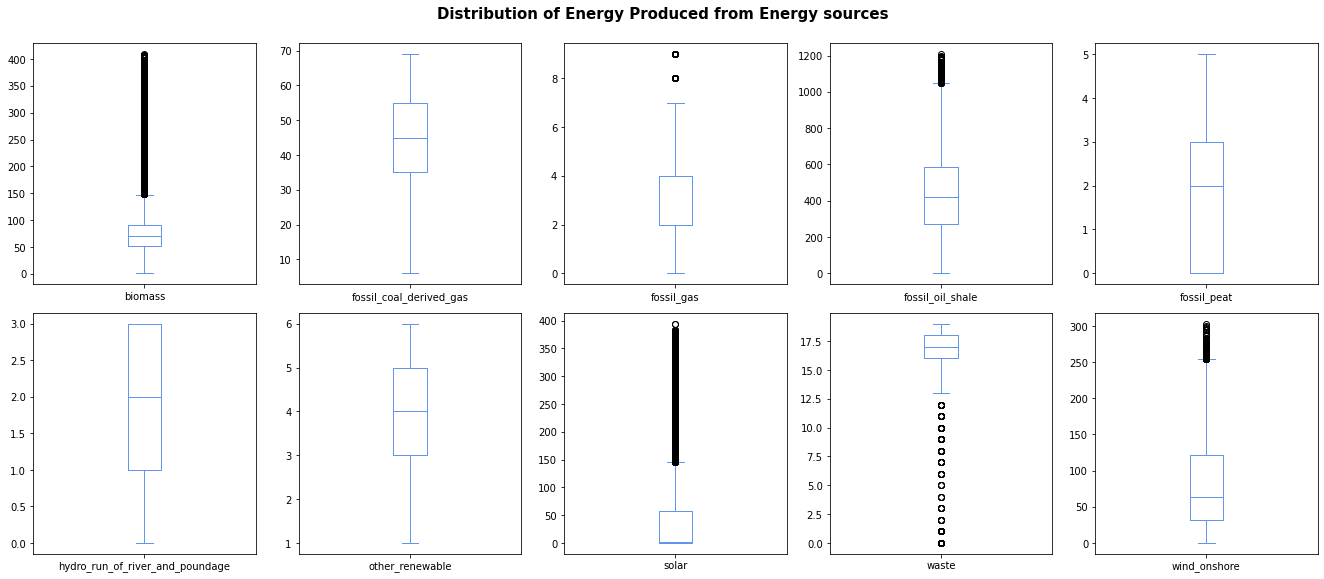

In [27]:
prod_data.drop(['other', 'date'], axis=1).plot.box(
    layout=(2,5), subplots=True, figsize=(18.5,8), color='cornflowerblue',)

plt.suptitle('Distribution of Energy Produced from Energy sources', y=1., 
             fontweight='bold', fontsize=15)
plt.tight_layout();

In [28]:
# checking the dates in nps_data but not in prod_data
pd.Series(list(set(nps_data.date).difference(set(prod_data.date)))).dt.date.unique()

array([datetime.date(2022, 12, 31)], dtype=object)

- Production data doesn't have data for 31st of December 2022. 
- We will use an inner join to merge both datasets

In [29]:
# dropping "other" variable
prod_data = prod_data.drop('other', axis=1)

__Filling Missing rows in Production data__

We will use the forward fill method to do that

In [30]:
# sorting and filling missing values in production data
prod_data = prod_data.sort_values('date')

prod_data = prod_data.ffill()

__Merging both data__

Both nps_data and prod_data do not have similar dates. Prod_data does not have data for Dec. 2021. As a result, we will do an inner join to merge both datasets and removing rows for 31-12-2022

In [31]:
# merged data
data = nps_data.merge(prod_data, on='date', how='inner')

#### Data Visualisation

__Temporal Pattern and Stable/hectic pattern in production?__

In [32]:
# 30-day Daily production
df = prod_data.resample('D',on='date').mean().rolling('30D').mean().reset_index()

In [33]:
fig = make_subplots(rows=1, cols=3, vertical_spacing=0.07, horizontal_spacing=0.04,
                    y_title='Energy Produced (MW/hr)', x_title='Date',shared_xaxes=True,
                    subplot_titles=['Biomass', 'Other Renewable', 'Solar'])

fig.add_trace(go.Scatter(x=df['date'], y=df['biomass']), row=1, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['other_renewable']), row=1, col=2)
fig.add_trace(go.Scatter(x=df['date'], y=df['solar']), row=1, col=3)
fig.update_layout(showlegend=False, height=450, width=1200,
                  title_text="Energy Production (30-Day Moving Average)")
fig.show('notebook')

- Energy Production from Solar has a circular mode, where it increases from around February, peaks in the Summer (May-July) and then begins to decline (complete its cycle) towards the end of the year (months when there are little amounts of solar energy). The energy demand is not hectic as it is relatively stable throughout every year


- Energy production from biomass is relatively stable month-to-month. Between Jan 2021 and April 2022, the average monthly energy production from biomass has been below 100 MW/hr on average, however towards the end of April and October 2022, the amount of energy produced from biomass began to increase with 3-peak fluctuations encountered in June, July and October, with energy amounts above 150 MW/hr. However, from Oct 2022, the amount of energy produced began to decline to below 100 MW/hr. This increased produced from April-Oct 2022 could be due to the uncertainty experienced in the world economy from Russian-Ukrainian war, which resulted to the scarcity of cheap fuel from Russia (major exporter of fossil fuel to Baltic countries), leading to Baltic countries finding an alternative strategy to maintain fuel demand.


- However, for other renewables, the amount of energy produced has been low, maintaining the 3-3.8 average between Jan 2021 and October 2022 before declining to and remaining at 1 MW/hr on average ever since (till Dec 2022).

In [34]:
fig = make_subplots(rows=1, cols=3, vertical_spacing=0.07, horizontal_spacing=0.04,
                    y_title='Energy Produced (MW/hr)', x_title='Date', shared_xaxes=True,
                    subplot_titles=['Waste', 'Fossil Gas', 'Fossil Coal Derived Gas'])

fig.add_trace(go.Scatter(x=df['date'], y=df.waste), row=1, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df.fossil_gas), row=1, col=2)
fig.add_trace(go.Scatter(x=df['date'], y=df.fossil_coal_derived_gas), row=1, col=3)
fig.update_layout(showlegend=False, height=450, width=1200,
                  title_text="Energy Production (30-Day Moving Average)")
fig.show('notebook')

- The amount of energy produced from waste has been unstable all thoughout the two years with no temporal pattern seen except that at production seems to dip in July of every year.
- For energy sources derived from fossil fuels such as fossil gas and fossil coal derived gas, have been pretty regular between Jan 2021 and Dec 2022 with fluctuations in some days of some months. For Fossil gas, the amount of energy produced began to increase from less than 2 MW/hr in July 2022 till the end of 2022. We could see the uncertainty experienced around the time of Russian-Ukraine invasion where in production peaked in May 2022.

In [35]:
fig = make_subplots(rows=2, cols=2, vertical_spacing=0.07, horizontal_spacing=0.04,
                    y_title='Energy Produced (MW/hr)', x_title='Date', shared_xaxes=True,
                    subplot_titles=['Fossil Oil Shale', 'Wind On-Shore', 
                                    'Hydro Run of River and Poundage', 'Fossil Peat'])

fig.add_trace(go.Scatter(x=df['date'], y=df.fossil_oil_shale), row=1, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['wind_onshore']), row=1, col=2)
fig.add_trace(go.Scatter(x=df['date'], y=df.hydro_run_of_river_and_poundage), row=2, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df.fossil_peat), row=2, col=2)
fig.update_layout(showlegend=False, height=650, width=1200,
                  title_text="Energy Production (30-Day Moving Average)")
fig.show('notebook')

- Energy production from fossil oil shale seems to peak at the beginning of every year (Dec-Feb). This can be seen in 2021, 2022 and also the pattern seems to be developing at the end of 2022 (Dec 2022).
- Energy production from Wind on-shore seems to follow the same pattern as fossil oil shale. Also, the production rate seems to be stable across months.
- For energy production from water sources, there's no temporal pattern seen and production seems to be stable across months.
- Energy production from Fossil Peat is stable. High production seen around Feb-April 2022, with a decline in May and ever since, there has been no energy production from fossil peats (0 MW/hr)
- Energy produced seems to decline in the summer time, especially in July. This is seen in all the energy types investigated except from solar sources. This could be because at those times of the year (Summer), the energy from the sun is very high and must be maximised and utilised to save energy production costs.

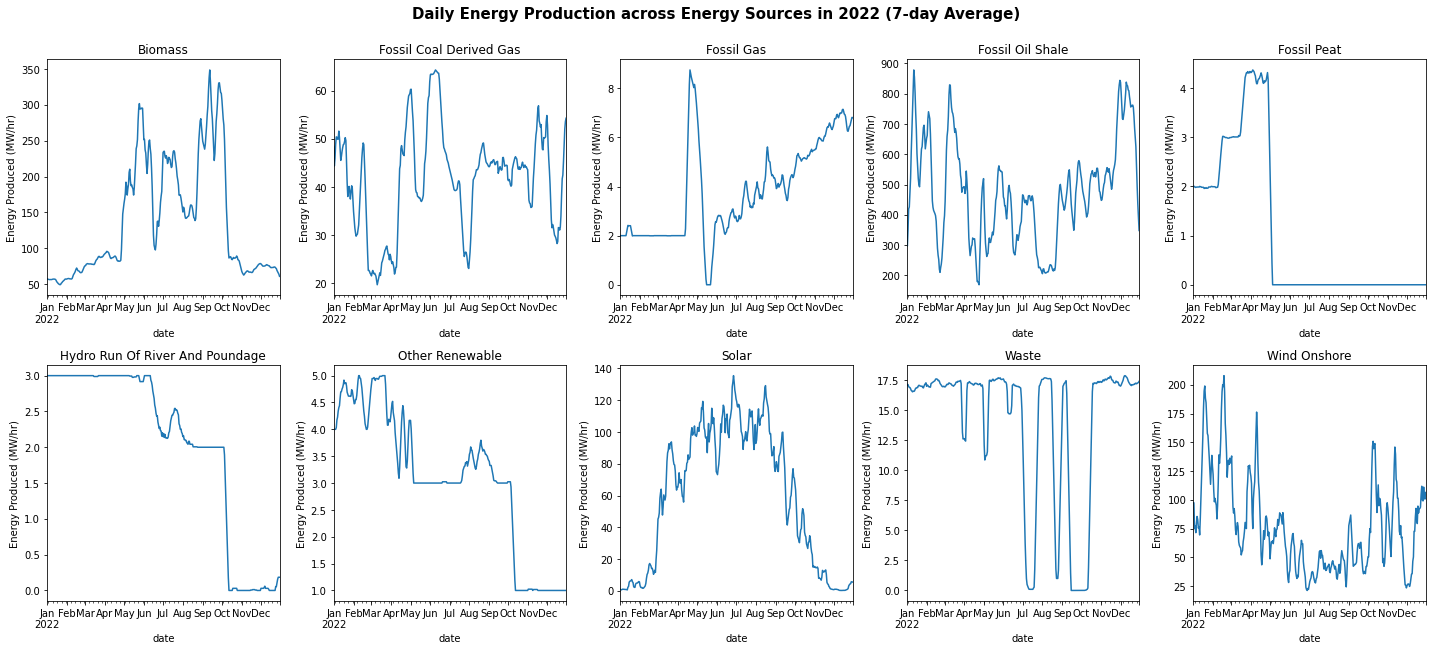

In [36]:
df = prod_data[prod_data.date.dt.date.astype('datetime64') >= "2022-01-01"].set_index('date').resample('D').mean().rolling('7D').mean()
plt.figure(figsize=(20,9))
for i, col in enumerate(df.columns):
  plt.subplot(2,5, i+1)
  df[col].plot(title=col.replace('_', ' ').title(),  ylabel='Energy Produced (MW/hr)')
plt.suptitle('Daily Energy Production across Energy Sources in 2022 (7-day Average)', fontsize=15, fontweight='bold', y=1.0)
plt.tight_layout();

- Energy sources from Hydro run of river and poundage, solar, fossil peats, biomass, fossil gas, other other_renewables have been relatively stable in 2022 than the others.
- Energy produced from waste, fossil coal derived gas, fossil oil shale and wind onshore were hectic in 2022 with huge fluctuations every week.

__Correlations__

In [37]:
# correlation between production types and price
corr = data.iloc[:,1:].corr()

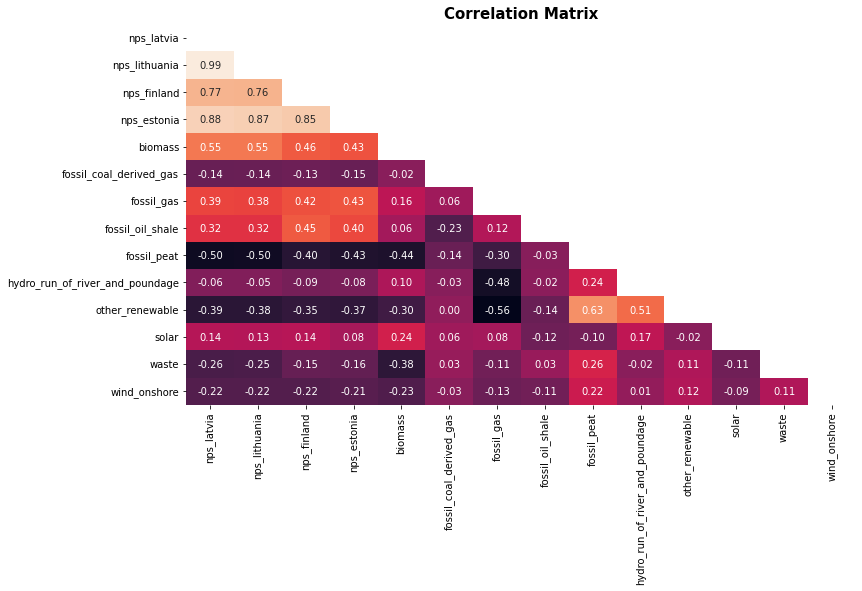

In [38]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, mask=np.triu(corr), annot=True, fmt='.2f', cbar=False)
plt.title('Correlation Matrix', fontsize=15, fontweight='bold')
plt.show()

- There is a negative relationship between the energy produced from renewable and non-renewable sources. For example, there's an inverse (negative) correlation between fossil gas, fossil oil shale and waste, wind on-shore, other renewable, solar hydro_run_of_river_and_poundage and biomass. However, this relationship is mostly weak and moderate, meaning that an increase in energy production from renewable sources will not always lead to a decrease in energy production from non-renewable sources. 
This is not the same with fossil coal derived gas and fossil peat, where there's a positive relationship between them and the renewable energy sources.
- There's a very strong positive relationship between energy prices in all Baltic countries. This indicates that an increase/decrease in energy price in one country will cause an increase/decrease in energy price in the other countries.
- When the amount of energy produced from wind_onshore, waste, other_renewable, hydro_run_of_river_and_poundage, fossil_coal_derived_gas and fossil_peats decreases, energy price in the four countries increases, and vice-versa. However, this relationship is weak and negative

- On the other hand, for biomass, fossil_gas and fossil_oil_shale, a decrease in their energy production will lead to an decrease in energy price and vice-versa.This correlation between these energy sources is also weak and moderate in some cases.

__Does renewable energy production increase Nord Pool price__

To do this, we will group energy sources that are _renewable_ into one group and the others into another group called _non-renewables_

In [39]:
renewable = [i for i in data.columns[1:] if 'fossil' not in i and 'nps' not in i]
not_renewable = [i for i in data.columns[1:] if 'fossil' in i]
av_price = data.filter(like='nps').mean(1) # average price all country

print('Renewable\n')
for col in renewable:
  r, pval = stats.pearsonr(data[col], av_price)
  print(f'{col}\nr: {r:.3f}\tpvalue: {pval:.3e}\n')

Renewable

biomass
r: 0.529	pvalue: 0.000e+00

hydro_run_of_river_and_poundage
r: -0.072	pvalue: 9.014e-22

other_renewable
r: -0.396	pvalue: 0.000e+00

solar
r: 0.128	pvalue: 2.673e-65

waste
r: -0.223	pvalue: 5.962e-197

wind_onshore
r: -0.231	pvalue: 1.640e-210



- For all renewable derived energy, except solar and biomass, an increase in production causes a decrease in price (and vice-versa). This relationship is statistically significant, with pvalues less than 5% level. 

On the other hand, for biomass and solar sources there's strong evidence to show that an increase in energy production causes price increase.

In [40]:
print('Non-Renewable\n')
for col in not_renewable:
  r, pval = stats.pearsonr(data[col], av_price)
  print(f'{col}\nr: {r:.3f}\tpvalue: {pval:.3e}\n')

Non-Renewable

fossil_coal_derived_gas
r: -0.148	pvalue: 9.341e-87

fossil_gas
r: 0.427	pvalue: 0.000e+00

fossil_oil_shale
r: 0.389	pvalue: 0.000e+00

fossil_peat
r: -0.487	pvalue: 0.000e+00



__Hourly and Weekly Trends__

In [41]:
# copy of merged data
data_copy = data.copy()

# creating weekly, year and hour columns
data_copy = data_copy.assign(
    hour=data_copy.date.dt.hour,
    week=data_copy.date.dt.isocalendar().week,
    month=data_copy.date.dt.month,
    year=data_copy.date.dt.year
)

In [42]:
# get country names
country_price = [i for i in data_copy if 'nps' in i]

__Weekly__

In [43]:
# weekly trends
week_production = data_copy.groupby(['week'])[renewable+not_renewable].mean().rolling(1).mean().reset_index()
weekly_price = data_copy.groupby(['week'])[country_price].mean().mean(1).rolling(1).mean().reset_index(name='price')

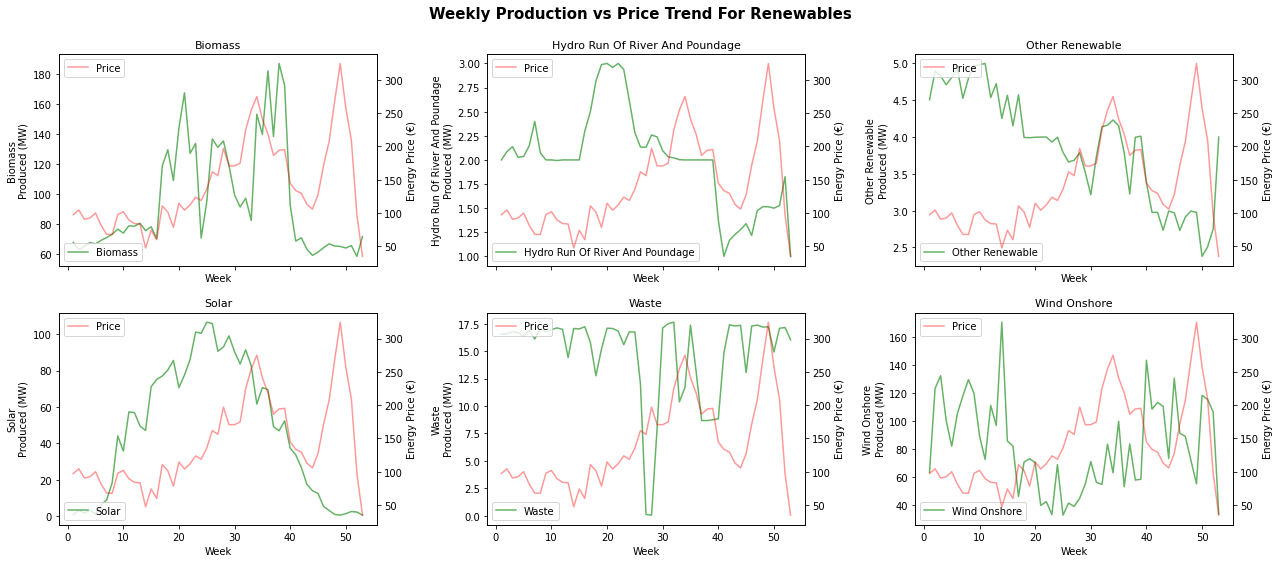

In [44]:
subplot_titles = [i.replace('_', ' ').title() for i in renewable]

fig, ax1 = plt.subplots(2,3, figsize=(18,8), sharex=True)
c = 0 # get variable count
for  i in range(2):
  for j in range(3):
    ax2 = ax1[i,j].twinx()
    ax1[i,j].plot(week_production.week, week_production[renewable[c]], 'g', alpha=0.6)
    ax2.plot(weekly_price.week, weekly_price.price, 'r',alpha=0.4,label='Price')
    plt.title(f'{subplot_titles[c]}', fontsize=11)
    ax1[i,j].set_ylabel(f'{subplot_titles[c]}\nProduced (MW)')
    ax1[i,j].set_xlabel('Week')
    ax2.set_ylabel('Energy Price (€)')
    ax1[i,j].legend([f'{subplot_titles[c]}'], loc='lower left')
    ax2.legend(['Price'])
    
    c += 1
  fig.suptitle('Weekly Production vs Price Trend For Renewables', fontsize=15, fontweight='bold')
  fig.tight_layout(pad=1.5)

- For most of the renewable energy sources, there's no strong weekly trend in energy produced or price, except for solar, biomass and wind onshore

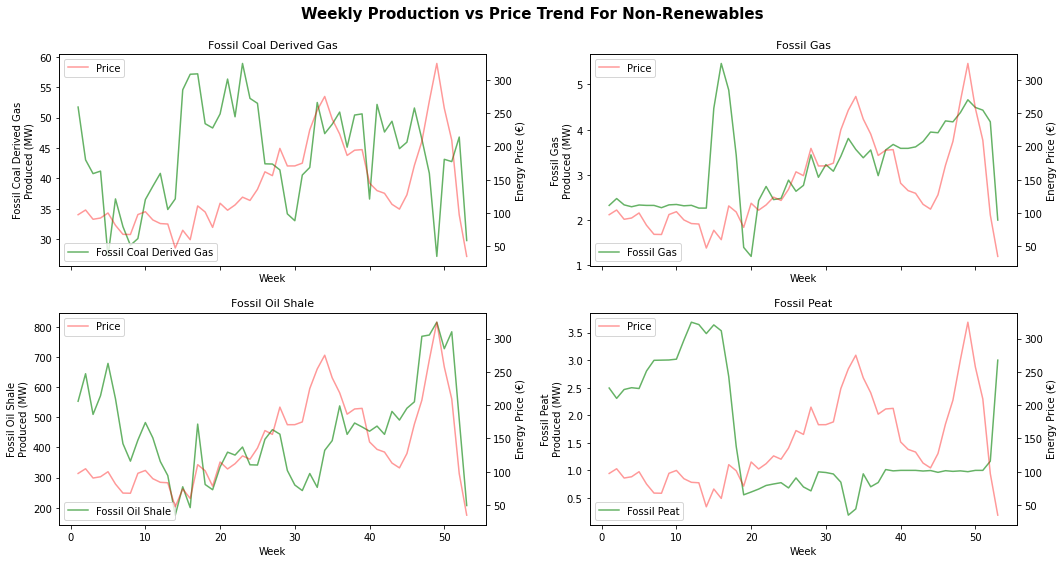

In [45]:
subplot_titles = [i.replace('_', ' ').title() for i in not_renewable]

fig, ax1 = plt.subplots(2,2, figsize=(15,8), sharex=True)
c = 0 # get variable count
for  i in range(2):
  for j in range(2):
    ax2 = ax1[i,j].twinx()
    ax1[i,j].plot(week_production.week, week_production[not_renewable[c]], 'g', alpha=0.6)
    ax2.plot(weekly_price.week, weekly_price.price, 'r',alpha=0.4,label='Price')
    plt.title(f'{subplot_titles[c]}', fontsize=11)
    ax1[i,j].set_ylabel(f'{subplot_titles[c]}\nProduced (MW)')
    ax1[i,j].set_xlabel('Week')
    ax2.set_ylabel('Energy Price (€)')
    ax1[i,j].legend([f'{subplot_titles[c]}'], loc='lower left')
    ax2.legend(['Price'])
    
    c += 1
  fig.suptitle('Weekly Production vs Price Trend For Non-Renewables', fontsize=15, fontweight='bold')
  fig.tight_layout(pad=1.5)

- There seems to be a strong weekly trend in fossil oil shale and energy price than with other non-renewable energy sources. The production for fossil oil shale peaks towards the end of the year (48-50 weeks)

__Hourly__

In [46]:
# weekly trends
hour_production = data_copy.groupby(['hour'])[renewable+not_renewable].mean().rolling(1).mean().reset_index()
hour_price = data_copy.groupby(['hour'])[country_price].mean().mean(1).rolling(1).mean().reset_index(name='price')

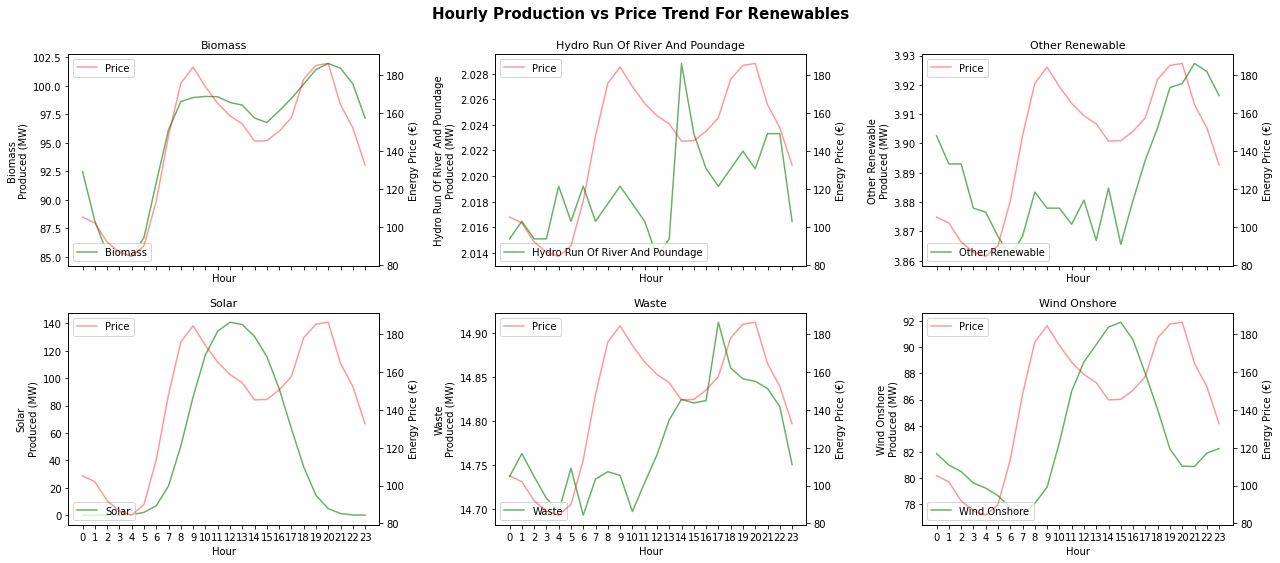

In [47]:
subplot_titles = [i.replace('_', ' ').title() for i in renewable]

fig, ax1 = plt.subplots(2,3, figsize=(18,8), sharex=True)
c = 0 # get variable count
for  i in range(2):
  for j in range(3):
    ax2 = ax1[i,j].twinx()
    ax1[i,j].plot(hour_production.hour.astype(str), hour_production[renewable[c]], 'g', alpha=0.6)
    ax2.plot(hour_price.hour.astype(str), hour_price.price, 'r',alpha=0.4,label='Price')
    plt.title(f'{subplot_titles[c]}', fontsize=11)
    ax1[i,j].set_ylabel(f'{subplot_titles[c]}\nProduced (MW)')
    ax1[i,j].set_xlabel('Hour')
    ax2.set_ylabel('Energy Price (€)')
    ax1[i,j].legend([f'{subplot_titles[c]}'], loc='lower left')
    ax2.legend(['Price'])
    
    c += 1
  fig.suptitle('Hourly Production vs Price Trend For Renewables', fontsize=15, fontweight='bold')
  fig.tight_layout(pad=1.5)

- There seems to be the presence of a strong hourly trend between biomass,  wind onshore, solar production and hourly energy price.
- For solar energy, the production is highest between 10am and 7pm, with peak experienced at 12 noon, when the sun is overhead.
- for wind onshore, its production peaks around 3pm, but at that time of the day, energy price is lower

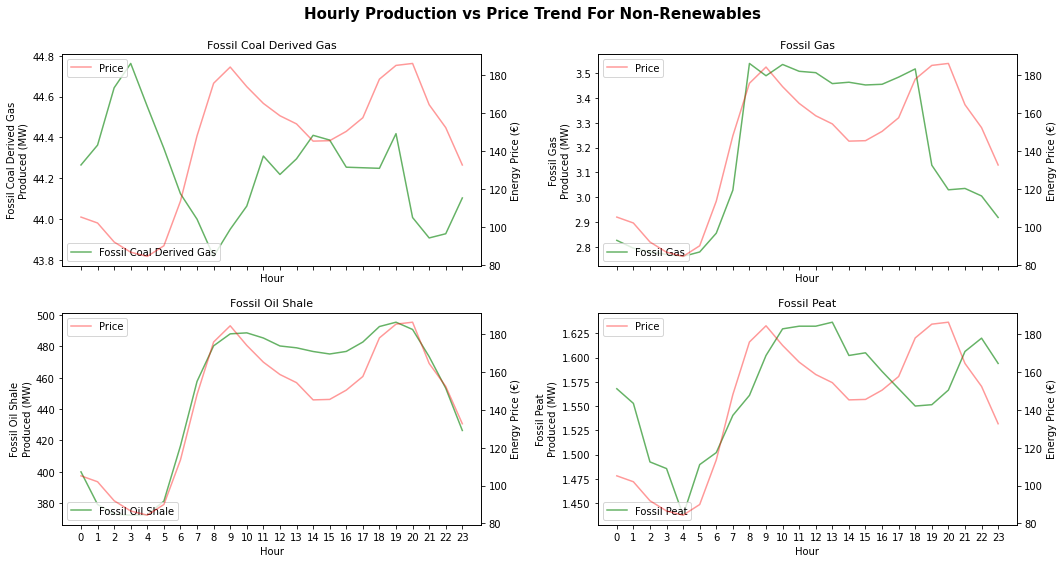

In [48]:
# for non-renewables
subplot_titles = [i.replace('_', ' ').title() for i in not_renewable]

fig, ax1 = plt.subplots(2,2, figsize=(15,8), sharex=True)
c = 0 # get variable count
for  i in range(2):
  for j in range(2):
    ax2 = ax1[i,j].twinx()
    ax1[i,j].plot(hour_production.hour.astype(str), hour_production[not_renewable[c]], 'g', alpha=0.6)
    ax2.plot(hour_price.hour.astype(str), hour_price.price, 'r',alpha=0.4,label='Price')
    plt.title(f'{subplot_titles[c]}', fontsize=11)
    ax1[i,j].set_ylabel(f'{subplot_titles[c]}\nProduced (MW)')
    ax1[i,j].set_xlabel('Hour')
    ax2.set_ylabel('Energy Price (€)')
    ax1[i,j].legend([f'{subplot_titles[c]}'], loc='lower left')
    ax2.legend(['Price'])
    c += 1
  fig.suptitle('Hourly Production vs Price Trend For Non-Renewables', fontsize=15, fontweight='bold')
  fig.tight_layout(pad=1.5)

- There is a strong positive hourly trend in fossil oil shale, fossil peat, and fossil gas productions with energy price that each hour. Also their production levels peaks twice in a day, mostly in the mornings from 8am-12pm and peaks a second time between 6-8pm. Energy price at those times are the highest.

__Average Monthly Energy Price by Country__

In [49]:
# average montly price ()
monthly_prices = (nps_data
                  .set_index('date')
                  .resample('D').mean()
                  .rolling('30D').mean()
                  .stack()
                  .reset_index(name='Monthly Price')
                  )

# rename country column 
monthly_prices = monthly_prices.rename(columns={'level_1':'country'})


fig = px.line(data_frame=monthly_prices, x='date', y='Monthly Price', 
              color='country', height=600, width=900, 
             title='Average Monthly Energy Price By Country (30-day Moving Average)',
             labels = {'Monthly Price':'Monthly Price (€)','date' :'Months'})
fig.show('notebook')

- Energy for all countries are relatively the same all through the year, with fluctuations at various points from Jan 2021 and Dec 2022
- An increase in energy prices from Jan 2021 to September 2021, with a short decrease in Oct 2021, and an increase in Dec 2021 and Jan 2022. 
-Since April 2022 till Dec 2022, there has been huge, irregular fluctuations in energy prices. This possible could be as a result of the Russian Invasion on Ukraine in Feb 2022 which caused fear around the world and Europe, since European countries of which the Baltic countries are heavily dependent on energy from Russia
- Energy costs in Latvia and Lithuania have been the highest all through 2021 and 2022 (above Euro 400 in Sept 2022), with Finland having the least energy price month-to-month on average, after Estonia.

__Average energy price per hour by country__

In [50]:
# copy of nps_data
nps_copy = nps_data.copy()

In [51]:
nps_copy = nps_copy.assign(
    week=nps_copy.date.dt.week,
    month=nps_copy.date.dt.month,
    hour =nps_copy.date.dt.hour,
    year = nps_copy.date.dt.year,
    dow = nps_copy.date.dt.day_name()
    )

<ipython-input-51-1f1f4c775241>:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [52]:
# hourly price by country
df = (nps_copy
      .groupby('hour')[country_price].mean()
      .reset_index()
      .melt(id_vars='hour', var_name='country', value_name='price')
      )

In [53]:
fig = px.line(df, x='hour', y='price', color='country', 
              title='Hourly Energy Price by Country',
              height=500, width=800, labels={'price':'Price €', 'hour':'Hour of Day'})

fig.show('notebook')

- Energy price peaks two times of the day (betweem 8-9am and 7-8pm) across countries

__Energy Price acrosss day of the week__

In [54]:
# How is energy price across day of the week
df = (nps_copy
      .groupby('dow')[country_price].mean()
      .reset_index()
      .melt(id_vars='dow', var_name='country', value_name='price')
      )

In [55]:
fig = px.bar(df, color='dow', y='price', x='country', 
             title='Weekday Energy Price by Country', barmode='group',
             category_orders={'dow':['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                     'Friday', 'Saturday','Sunday']},
             height=500, width=800, 
             labels={'price':'Price €', 'dow':'Day of Week','country':'Country'})
fig.show('notebook')

- Energy price is least during weekends (Saturdays and Sundays) than in any other days

#### Data Preprocessing 

- We will extract time features from the date variable before dropping it. We will extract the hour, month, quarter. We also see that electricity during weekends are the least. Therefore we will create a binary variable that indicates if the day of week is weekend or not.
- From exploration, we saw that there are outliers in the energy prices (values above 1000). As a result, we will bin value that are above 1000 to 1000

In [56]:
def get_weekend(x):
  return 1 if 'Sat' in x or 'Sun' in x else 0

In [57]:
# extract date features
data = data.assign(
    month=data.date.dt.month,
    hour =data.date.dt.hour,
    year = data.date.dt.year,
    quarter = data.date.dt.quarter,
    isweekend = data.date.dt.day_name().apply(get_weekend)
    )

In [58]:
# clipping prices above 1000 to 1000
data[country_price] = data[country_price].clip(None, 1000)

## Task 2. Post-Birthday Electricity Price Prediction

### Task Description

Using the given data, build a model that predicts Estonian Nord Pool energy price for 3 days after your last year's birthday.

- State when is your birthday (if by any extraordinary chance you have your birthday on the 29th of February, choose something close to it).
- Feel free to implement any model you like.
- Include reasonable performance metrics for your model (justify your choice of metrics).
- Make sure to visualize the results/predictions.

The Lasso Regressor model will be used to fit a model that will predict energy prices for Estonia 3days after my last year's birthday. Because this model is a linear model and has underlying assumptions about the variable distributions, and also requires that categorical variables be dummy-encoded, therefore we will preprocess these variables into their appropriate format but will remove one category in each categorical variable while dummy-encoding.

As we saw in the visualisation, energy prices have negative values in them and the distributions are not normal, therefore we will transform these features using the square root transformation to make the distribution resemble a normal distribution. Because square root transformation works with positive values, we will shift the negative values by a certain number before transformation. Transformation helps make a numerical distribution resemble normal and also reduces the effect of outliers. Therefore, transformation will be done on numerical features with possible outliers in them to reduce the effect of outliers since outliers have the potential to affect the performance of linear models. 

Also, to prevent one variable having undue advantage over the other, we will scale them by first subtracting from their mean and dividing by their standard deviation (Standardisation). Similarly, because there's multicollinearity amongst the country-wise energy prices, Lasso regression is used to penalise their coefficients since it is a type of a penalised linear regression model and also further shrinks less useful features to zero. 

All these preprocessing techniques will be put into a pipeline


Before developing a model, the dataset will be split into 2, a training and test data. The training data will contain records without records for 3days after my last year's birthday

 A 5-fold cross validation strategy will be used to tune the hyperparameters of the chosen model and the model with the best performance in _Mean Absolute Error_ (MAE) which tells us how far on average our model's predictions are from the actual value. The _Root Mean Squared Error_ (RMSE) which tells us the average deviations between the model's predictions and their actual values. These models are chosen because they tell us the errors on our predictions and hence the lower the error the better the model's performance.

 __Assumption__
 - I assume that this is not a time-series model rather a predictive model which can be used to predict past energy price values given a set of independent variables

#### Modelling

In [59]:
## YOUR SOLUTION STARTS HERE ##
dob = '25-11'

In [60]:
# importing libraries/functions for modelling
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline

In [61]:
train = data[~data.date.dt.date.astype('datetime64').between('2022-11-26', '2022-11-28')]
test = data[data.date.dt.date.astype('datetime64').between('2022-11-26', '2022-11-28')]

In [62]:
train.shape[0] + test.shape[0] == data.shape[0]

True

In [63]:
seed = 42 #seed for reproducibility

In [64]:
# instantiating linear model
lasso = Lasso(random_state=seed)

In [65]:
# splitting into train and test predictors and target
xtrain = train.drop(columns=['date', 'nps_estonia', 'year'])
ytrain = np.sqrt(3+train.nps_estonia) # shifting by 3 and apply sqrt

xtest = test.drop(columns=['date', 'nps_estonia', 'year'])
ytest = np.sqrt(3+test.nps_estonia)

In [66]:
# get columns to preprocess
cat_cols = ['quarter', 'month']
price_cols = ['nps_latvia', 'nps_lithuania', 'nps_finland']
scale_cols = [col for col in xtrain.columns if col not in ['year', *cat_cols, 'nps_estonia', 'date', 'isweekend']]

# get idx
cat_cols = [xtrain.columns.get_loc(i) for i in cat_cols]
price_cols = [xtrain.columns.get_loc(i) for i in price_cols]
scale_cols = [xtrain.columns.get_loc(i) for i in scale_cols]

In [67]:
# transform features
preprocessor = ColumnTransformer([
    ('num1', FunctionTransformer(func=lambda x: x**0.5), [
        xtrain.columns.get_loc(i) for i in ['solar', 'biomass']]),
    ('num2', FunctionTransformer(func=lambda x: (3+x)**0.5), price_cols),
], remainder='passthrough')


# scale and dummy encode
preprocessor1 = ColumnTransformer([
    ('scaler', StandardScaler(), scale_cols),
    ('cat_features', OneHotEncoder(drop='first'), cat_cols)
], remainder='passthrough')


# modelling pipeline
model_pipe = Pipeline([
    ('transform', preprocessor),
    ('encode_scale', preprocessor1),
    ('model', lasso)
])

__Hyperparameter Tuning__

In [68]:
def eval_metrics(ytrue, ypred):
  # retransform to original scale
  ytrue = np.square(ytrue) - 3
  ypred = np.square(ypred) - 3
  rmse = mean_squared_error(ytrue, ypred, squared=False)
  mae = mean_absolute_error(ytrue, ypred)
  print(f'RMSE: {rmse:.4f}\tMAE: {mae:.4f}')

In [69]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [70]:
ridge_params = {
    'model__alpha' : np.logspace(-3, -1, 200)
}

In [71]:
# cross validation and 
gcv = GridSearchCV(model_pipe, ridge_params, 
                   scoring='neg_mean_absolute_error', 
                   cv=kfold, verbose=True, n_jobs=5)

gcv.fit(xtrain, ytrain);

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [72]:
gcv.best_params_, gcv.best_score_

({'model__alpha': 0.016831803533309566}, -0.9118294590809096)

__Predicting on test data__

In [73]:
# assigning the best model 
best_model = gcv.best_estimator_

In [74]:
# predict on test data
ypred = best_model.predict(xtest)
residuals = (np.square(ytest)-3) - (np.square(ypred)-3)

# model's performance
eval_metrics(ytest, ypred)

RMSE: 9.4069	MAE: 8.2586


- From the MAE, we see that our model is on average +- 8.26 off from accurately predicting hourly energy prices three days after my last year's birthday. Similarly, the deviation of the errors between predicted and actual values is about 9.41 (given by the RMSE) on average.

Now let's check the distribution of the residuals and the residual plot to see if a multiple linear regression model is suitable to explain the variance in energy prices in Estonia.

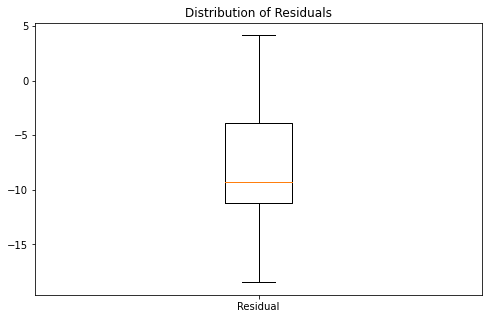

In [75]:
# distribution of the residuals
plt.figure(figsize=(8,5))
plt.boxplot(residuals, labels=['Residual'])
plt.title('Distribution of Residuals');

In [76]:
# testing for normality of the residuals
stats.shapiro(residuals)

ShapiroResult(statistic=0.9416624903678894, pvalue=0.0022963215596973896)

- From the Shapiro-Wilk test, we see that the distribution of the residual values is not normal (pvalue < 0.05) under the null hypothesis that the distribution is normal. As a result, we will reject the null that says that the residual's distribution is normal at 5% significance level.

__Predictions vs Actual values__

In [77]:
# correlation between actual values and residuals
np.corrcoef(np.square(ypred)-3, residuals)[0,1]

0.686787637231992

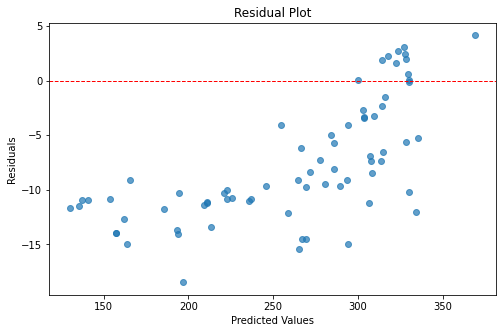

In [78]:
plt.figure(figsize=(8,5))
plt.scatter(np.square(ypred)-3, residuals, alpha=0.7)
plt.axhline(0, ls='--', color='r', lw=1)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

- From the residual plot, we see that a linear model is not the best model to use to predict energy price in Estonia. We see that there is a correlation between the residuals and the actual values. This tells us that the relationship between the independent variables and dependent variable is not linear as assumed by linear models.

A more sophisticated model such as Random forests, gradient boosting or neural networks may be adopted for better performance

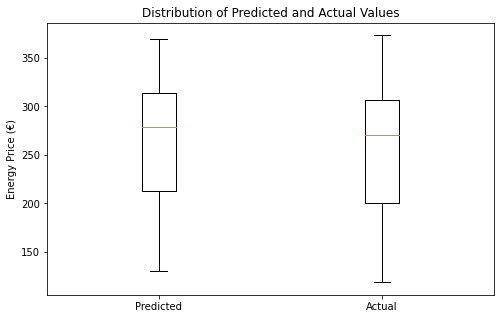

In [79]:
plt.figure(figsize=(8,5))
plt.boxplot(np.c_[np.square(ypred)-3, np.square(ytest)-3], labels=['Predicted', 'Actual'])
plt.title('Distribution of Predicted and Actual Values')
plt.ylabel('Energy Price (€)')
plt.show()

## Conclusion

- Hourly Energy prices depend on the demand and supply of energy produced from various energy sources. 
- The cost and availability of energy sources can affect the supply of energy produced from them. For example, we saw that solar derived energy is higher during the summer months.
- For all countries in the Baltic regions, energy prices are cheaper at weekends compared to weekdays.
- Energy prices are highest at two times of the day: Morning (around 8am-10am) and evening around 7-9pm
- For energy produced from most renewable sources, except biomass, there is a weak and negative relationship between them and energy prices. Also, for most non-renewable energy sources, an increase in production has the potential to increase prices. This could be because of the taxes levied by the government on energies from non-renewable sources in order to preserve the environment.
- We see also, that a penalised linear regression model is not suitable to model the relationship between predictors and dependent variable. A more sophisticated approach may be employed. One is the use of non-linear models, or adding non-linear variables or interaction features as independent features and then using the linear model to model the relationship.